<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/ML/%EC%9E%90%EC%8A%B5ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numpy

In [ ]:
import numpy as np

#### Boolean indexing

In [ ]:
# 불린 인덱싱 (Boolean indexing)
array1d = np.arange(start=1, stop=10)
# [] 안에 array1d > 5 Boolean indexing을 적용
array3 = array1d[array1d > 5]
print('array1d > 5 불린 인덱싱 결과 값 :', array3)

array1d > 5 불린 인덱싱 결과 값 : [6 7 8 9]


In [ ]:
test = np.arange(start = 10 , stop=100)
test30 = test[test<30]
print('시험 30보다 적은 수 :', test30)

시험 30보다 적은 수 : [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


In [ ]:
array1d >5

array([False, False, False, False, False,  True,  True,  True,  True])

In [ ]:
indexes = np.array([5,6,7,8])
array4 = array1d[indexes]
print('일반 인덱스로 필터링 결과 :', array4)

일반 인덱스로 필터링 결과 : [6 7 8 9]


#### 선형대수 연산 -행렬 내적과 전치 행렬 구하기

In [ ]:
# 행렬 내적(행렬 곱)
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[7,8],
              [9,10],
              [11,12]])
dot_product = np.dot(A,B)
print('행렬 내적 결과:\n', dot_product)

행렬 내적 결과:
 [[ 58  64]
 [139 154]]


In [ ]:
# 전치 행렬
A = np.array([[1,2],
              [3,4]])
transpose_mat = np.transpose(A)
print('A의 전치행렬 :\n', transpose_mat)

A의 전치행렬 :
 [[1 3]
 [2 4]]


## Pandas

DataFrame ix[]연산자

### 타이타닉 불러오기

In [ ]:
import pandas as pd

titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


##### Lambda

In [ ]:
a = [1,4,6]
squares =map(lambda x : x**2, a) #lambda 식을 이용할 때 여러 개의 값을 입력 인자로 사용해야 할 경우에는 보통 map()함수를 결합하여 사용
list(squares)

[1, 16, 36]

###### 타이타닉 Lambda 활용

In [ ]:
# Name 칼럼 문자열 개수를 별도의 칼럼인 Name_len에 생성
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x: len(x))
titanic_df[['Name', 'Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [ ]:
# if else 절 사용하여 나이가 15세 미만이면 'Child', 아니면 'Adult' 구분해 칼럼 만들기
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else 'Adult')
titanic_df[['Age', 'Child_Adult']].head(8)
# 결과를 보니 else를 써서 NaN값의 경우 Adult로 표시됨 이를 보았을때 우선 NaN값을 먼저 처리 혹은 확인하고 구분하는게 좋아보임 아니면 알고 있는 채로 먼저 구분 한다음에 처리를 해야 할것같음

,Age,Child_Adult
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,Adult
6,54.0,Adult
7,2.0,Child


In [ ]:
# lambda 사용 할 때 if else 사용 할때 주의할 점
# lambda x : if x <= 15 'Child' else 'Adult'가 아님
# lambda x : 'Child' if c<=15 else 'Adult' 이 맞다.
# if, else만 지원 if, else if, else와 같은 else if는 지원 안한다.

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else ('Adult' if x<= 60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      609
Elderly    199
Child       83
Name: Age_cat, dtype: int64

## iris

In [ ]:
# 사이킷 버전 확인
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# 붓꽃 데이터 세트 로딩
iris  = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
# iris.data : iris 데이터 세트에서
# 피처만으로 데이터를 numpy 가지고 잇음
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 사이킷런을 활용한 붓꽃

In [ ]:
# iris.targe : 붓꽃 데이터 세트에서
# 레이블(결정 값) 데이터를 numpy 가지고 있음(숫자)
# 레이블 = 결정값 = 정답(품종을 숫자로 표현)

iris_label = iris.target
print('iris target 값 :', iris_label)
print('iris target 명 :', iris.target_names)


iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


In [ ]:
# 붓꽃 데이터 DataFrame으로 변환
iris_df  = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.head()

# sepal : 꽃받침
# petal : 꽃잎

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- test_size는 전체 데이ㅓ에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
- trian_sise는 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정
- shuffle는 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정합니다. 디폴트는 True입니다. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용된다.
- random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값이다.

In [ ]:
# 학습 데이터와 테스트 데이터 세트로 분리
# page. 101 참고

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

page 94 참고
- 사이킷런은
- fit()은 ML 모델 학습을 위해서
- predict() 학습된 모델의 예측을 위해 제공하는 메서드이다.
- Classifier은 분류 알고리즘을 구현함
- Regressor은 최귀 알고리즘을 구현한 클래스

위 둘 클래스를 합쳐서 Estimator 클래스라고 부른다.

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train) #학습용 피처 데이터, 학습용 레이블(정답) 데이터

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이트 세트로 예측 수행
pred = dt_clf.predict(X_test) #테스트용 피처 데이터

In [ ]:
# 실제 데이터 레이블 값과 예측한 값 비교
print(pred) # 예측한 값
print(y_test) # 실제 레이블 값

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [ ]:
# 예측 정확도 확인
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))


예측 정확도 : 0.9333


## 붓꽃 데이터 예측


In [ ]:
# (1) 학습/데이터 세트로 분리하지 않고 예측
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()

train_data = iris.data # 속성만으로 된 데이터
train_label = iris.target # target 값(결정값(정답), 레이블 값)

# 학습 수행
# fit (학습용 피처 데이터, 학습용 target 데이터)
dt_clf.fit(train_data, train_label)

# 학습된 데이터 셋으로 예측 수행
# 테스트 데이터 세트 분리하지 않고 사용
pred = dt_clf.predict(train_data)

print('예측 정확도 :', accuracy_score(train_label, pred))

# 결과
# 예측을 별도로 분리되지 않고 학습된 train_data로 했기 때문에
# 결과 1.0(100%)으로 출력됨(잘못된 예측 방법)

예측 정확도 : 1.0


학습 데이터와 유사한 데이터로 테스트를 했다면 알고리즘이 안 좋더라도 예측 정확도가 높을 수 있음 (신뢰성 떨어짐)
알고리즘을 얼마나 잘 학습했느냐는 기존의 학습 데이터에는 포함 되어 잇지 않은 데이터에 대해 얼마나 잘 예측 할 수 있느냐와 밀접한 관계가 있음

In [ ]:
# (2) 학습/데이터 세트로 분리하고 예측
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

# 학습/테스트 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

# 학습 수행
dt_clf.fit(X_train, y_train)
# 예측 수행
pred = dt_clf.predict(X_test)
# 예측 정확도 출력
print('예측 정확도 : {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.955556


In [ ]:
import pandas as pd
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 피처 데이터 세트
ftr_df = iris_df.iloc[:, :-1]
#ftr_df

# 레이블이블 데이터 세트(target 값)
tgt_df = iris_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)


In [ ]:
# 학습 / 예측 / 예측 정확도

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.955556


DecisionTreeClassifier의 파라미터

- max_depth : 트리의 최대 깊이
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수 (디폴트 : 2)

In [ ]:
#GridSearchCV를 이용해서
#결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용하여
# 붓꽃 데이터 예측 분석

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

# 데이터를 로드하고 학습 데이터와 테스트 데이터 세트 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 하이퍼 파라미터 설정
# 파라미터들을 dictionary 형태로 설정
# key : 파라미터명, 리스트 값 : 파라미터 값
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

In [ ]:
import pandas as pd

#param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 
grid_dtree.fit(X_train, y_train) #학습 데이터 세트 사용
# fit(학습 데이터 세트)
# - 학습 데이터를 cv에 기술된 폴딩 세트로 분할해
# - param_grid에 기술된 하이퍼 파라미터들을 순차적으로 변경하면서 학스/평가 수행하고
# - 그 결과를 cv_results_ 속성에 기록 
# cv_results_ 속성 : GridSearchCV 결과 세트로 딕셔너리 형태

# GridSearchCV 결과 세트로 딕셔너리 형태인 cv_results_ 데이터 프레임으로 변환 후
# 필요한 파라미터 값만 추출
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000398,0.000061,0.000277,0.000023,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
1,0.000395,0.000050,0.000252,0.000010,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
2,0.000353,0.000009,0.000235,0.000006,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
3,0.000351,0.000003,0.000250,0.000023,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
4,0.000354,0.000005,0.000234,0.000005,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02
5,0.000355,0.000008,0.000243,0.000007,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02


In [ ]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설정
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train) # 학습 데이터 세트 사용
# fit(학습 데이터 세트)
# - 학습 데이터를 cv에 기술된 폴딩 세트로 분할해
# - param_grid에 기술된 하이퍼 파라미터들을 순차적으로 변경하면서 학스/평가 수행하고
# - 그 결과를 cv_results_ 속성에 기록
# cv_results_ 속성 : GridSearchCV 결과 세트로 딕셔너리 형태

# GridSearchCV 결과 세트로 딕셔너리 형태인 cv_results_ 데이터 프레임으로 변환 후
# 필요한 파라미터 값만 추출
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

# 파라미터를 순차 적용 횟수(6) X cv 세트[3] = 학습/검증 총 수행 횟수[18]
# rank_test_score : 예측 성능 순위
# 1위 일 때의 mean_test_score의 값이 0.975로 가장 높음[공동1위]
# 이 때의 파라미터 가 최적의 하이퍼 파라미터에 해당
# {'max_depth': 3, 'min_samples_split': 2}
# {'max_depth': 3, 'min_samples_split': 3}

# split0_test_score, split1_test_score, split2_test_score : cv=3
# mean_test_scor : 이 3 개의 성능 수치를 평균한 

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
# best_params_ 속성 :  최적의 파라미터 값 저장
# 최고 성능을 가지는 파라미터 조합과 예측 성능 1위 값 출력
print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


### 붓꽃 데이터 세트에 결정 트리 적용
- DecisionTreeClassifier 이용해 학습한 뒤
- 규칙 트리 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 학습/테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일로 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

# 생성된 .dot 파일 출력 방법 2가지
# 1. Graphviz 시각화 툴 사용 : .dot 파일 읽어서 출력
# 2. 이미지 파일로 변환해서 저장 후 출력 

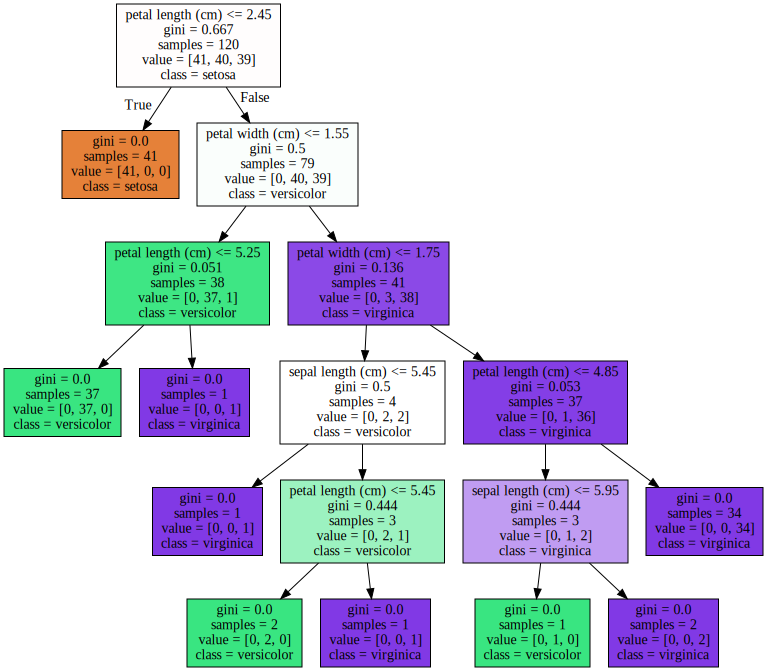

In [ ]:
# 1. Graphviz 시각화 툴 사용 : .dot 파일 읽어서 출력
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 Jupyter Notebook에 시각화
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

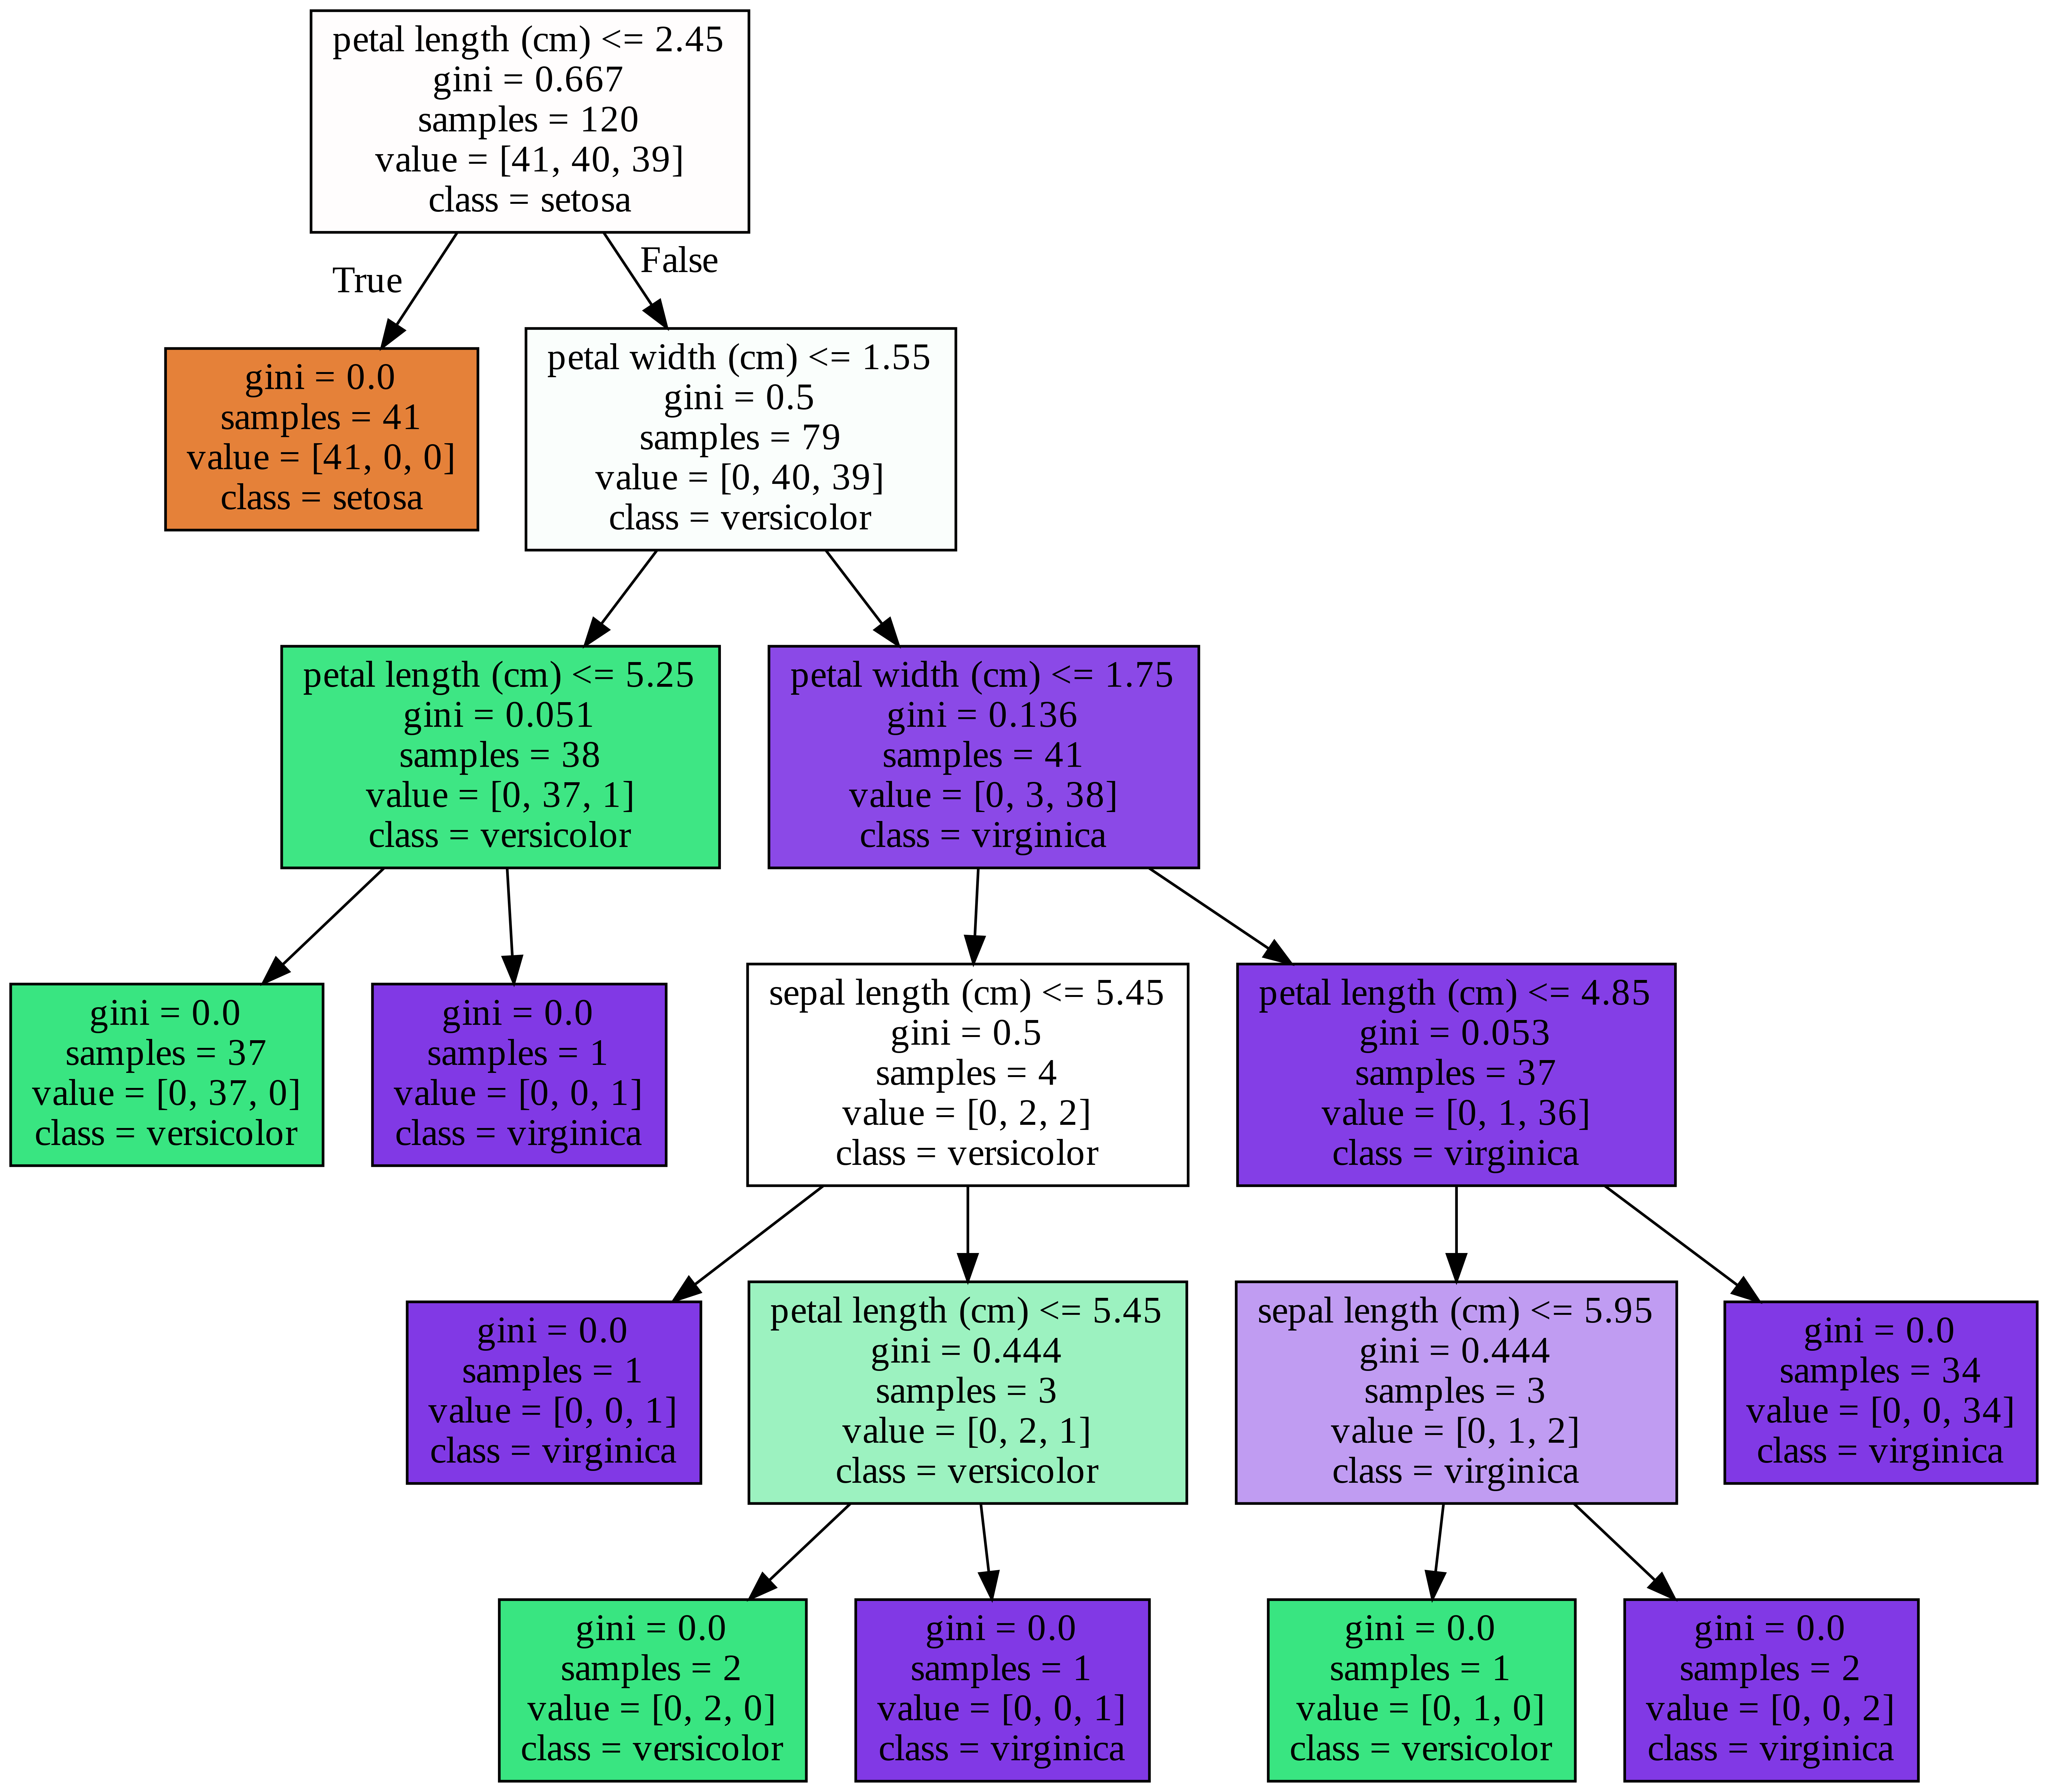

In [ ]:
# 2. 생성된 .dot 파일을 .png 파일로 변환해서 저장 후 출력
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')

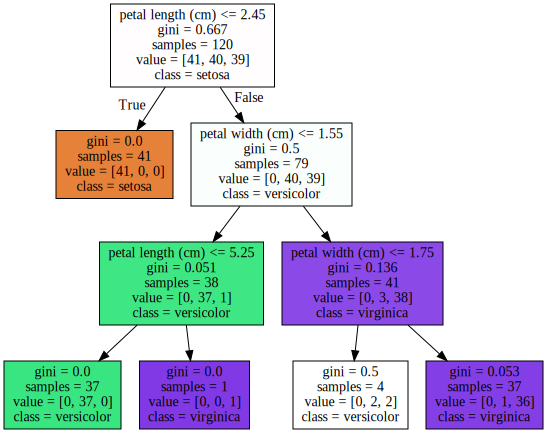

In [ ]:
# 결정 트리 하이퍼 파라미터 튜닝
# max_dedpth = 3으로 조정
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)

# 학습
dt_clf.fit(X_train, y_train)

# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일로 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

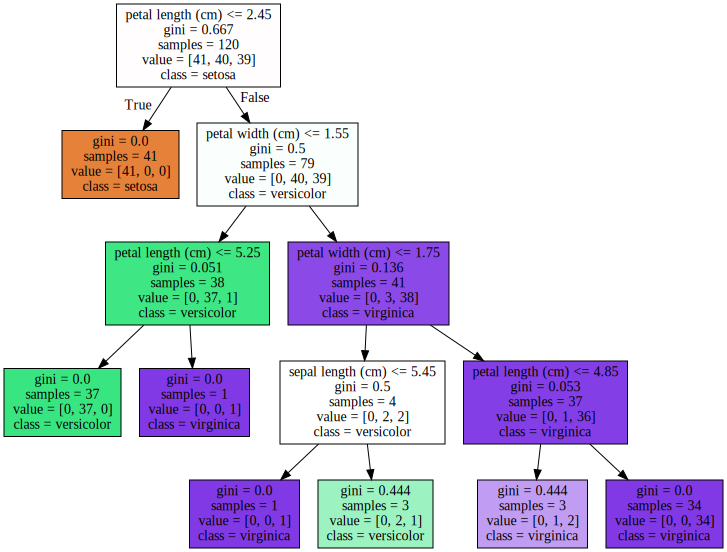

In [ ]:
# 결정 트리 하이퍼 파라미터 튜닝
# min_samples_split=4로 상향
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)

# 학습
dt_clf.fit(X_train, y_train)

# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일로 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 맨 아래 value [0, 2, 1]과 [0, 1, 2]는
# 서로 다른 클래스 값이 섞여 있는데도 분할하지 않고 리프 노드가 되었음
# 이유 :
# 샘플이 최소 4개는 되어야 분할 가능한데
# 샘플 개수가 3개밖에 없으므로 더 이상 자식 규칙 노드를 위한 분할을 하지 않음
# 트리 깊이도 줄어서 더 간결한 결정 트리 생성

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)

# 학습
dt_clf.fit(X_train, y_train)

# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일로 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

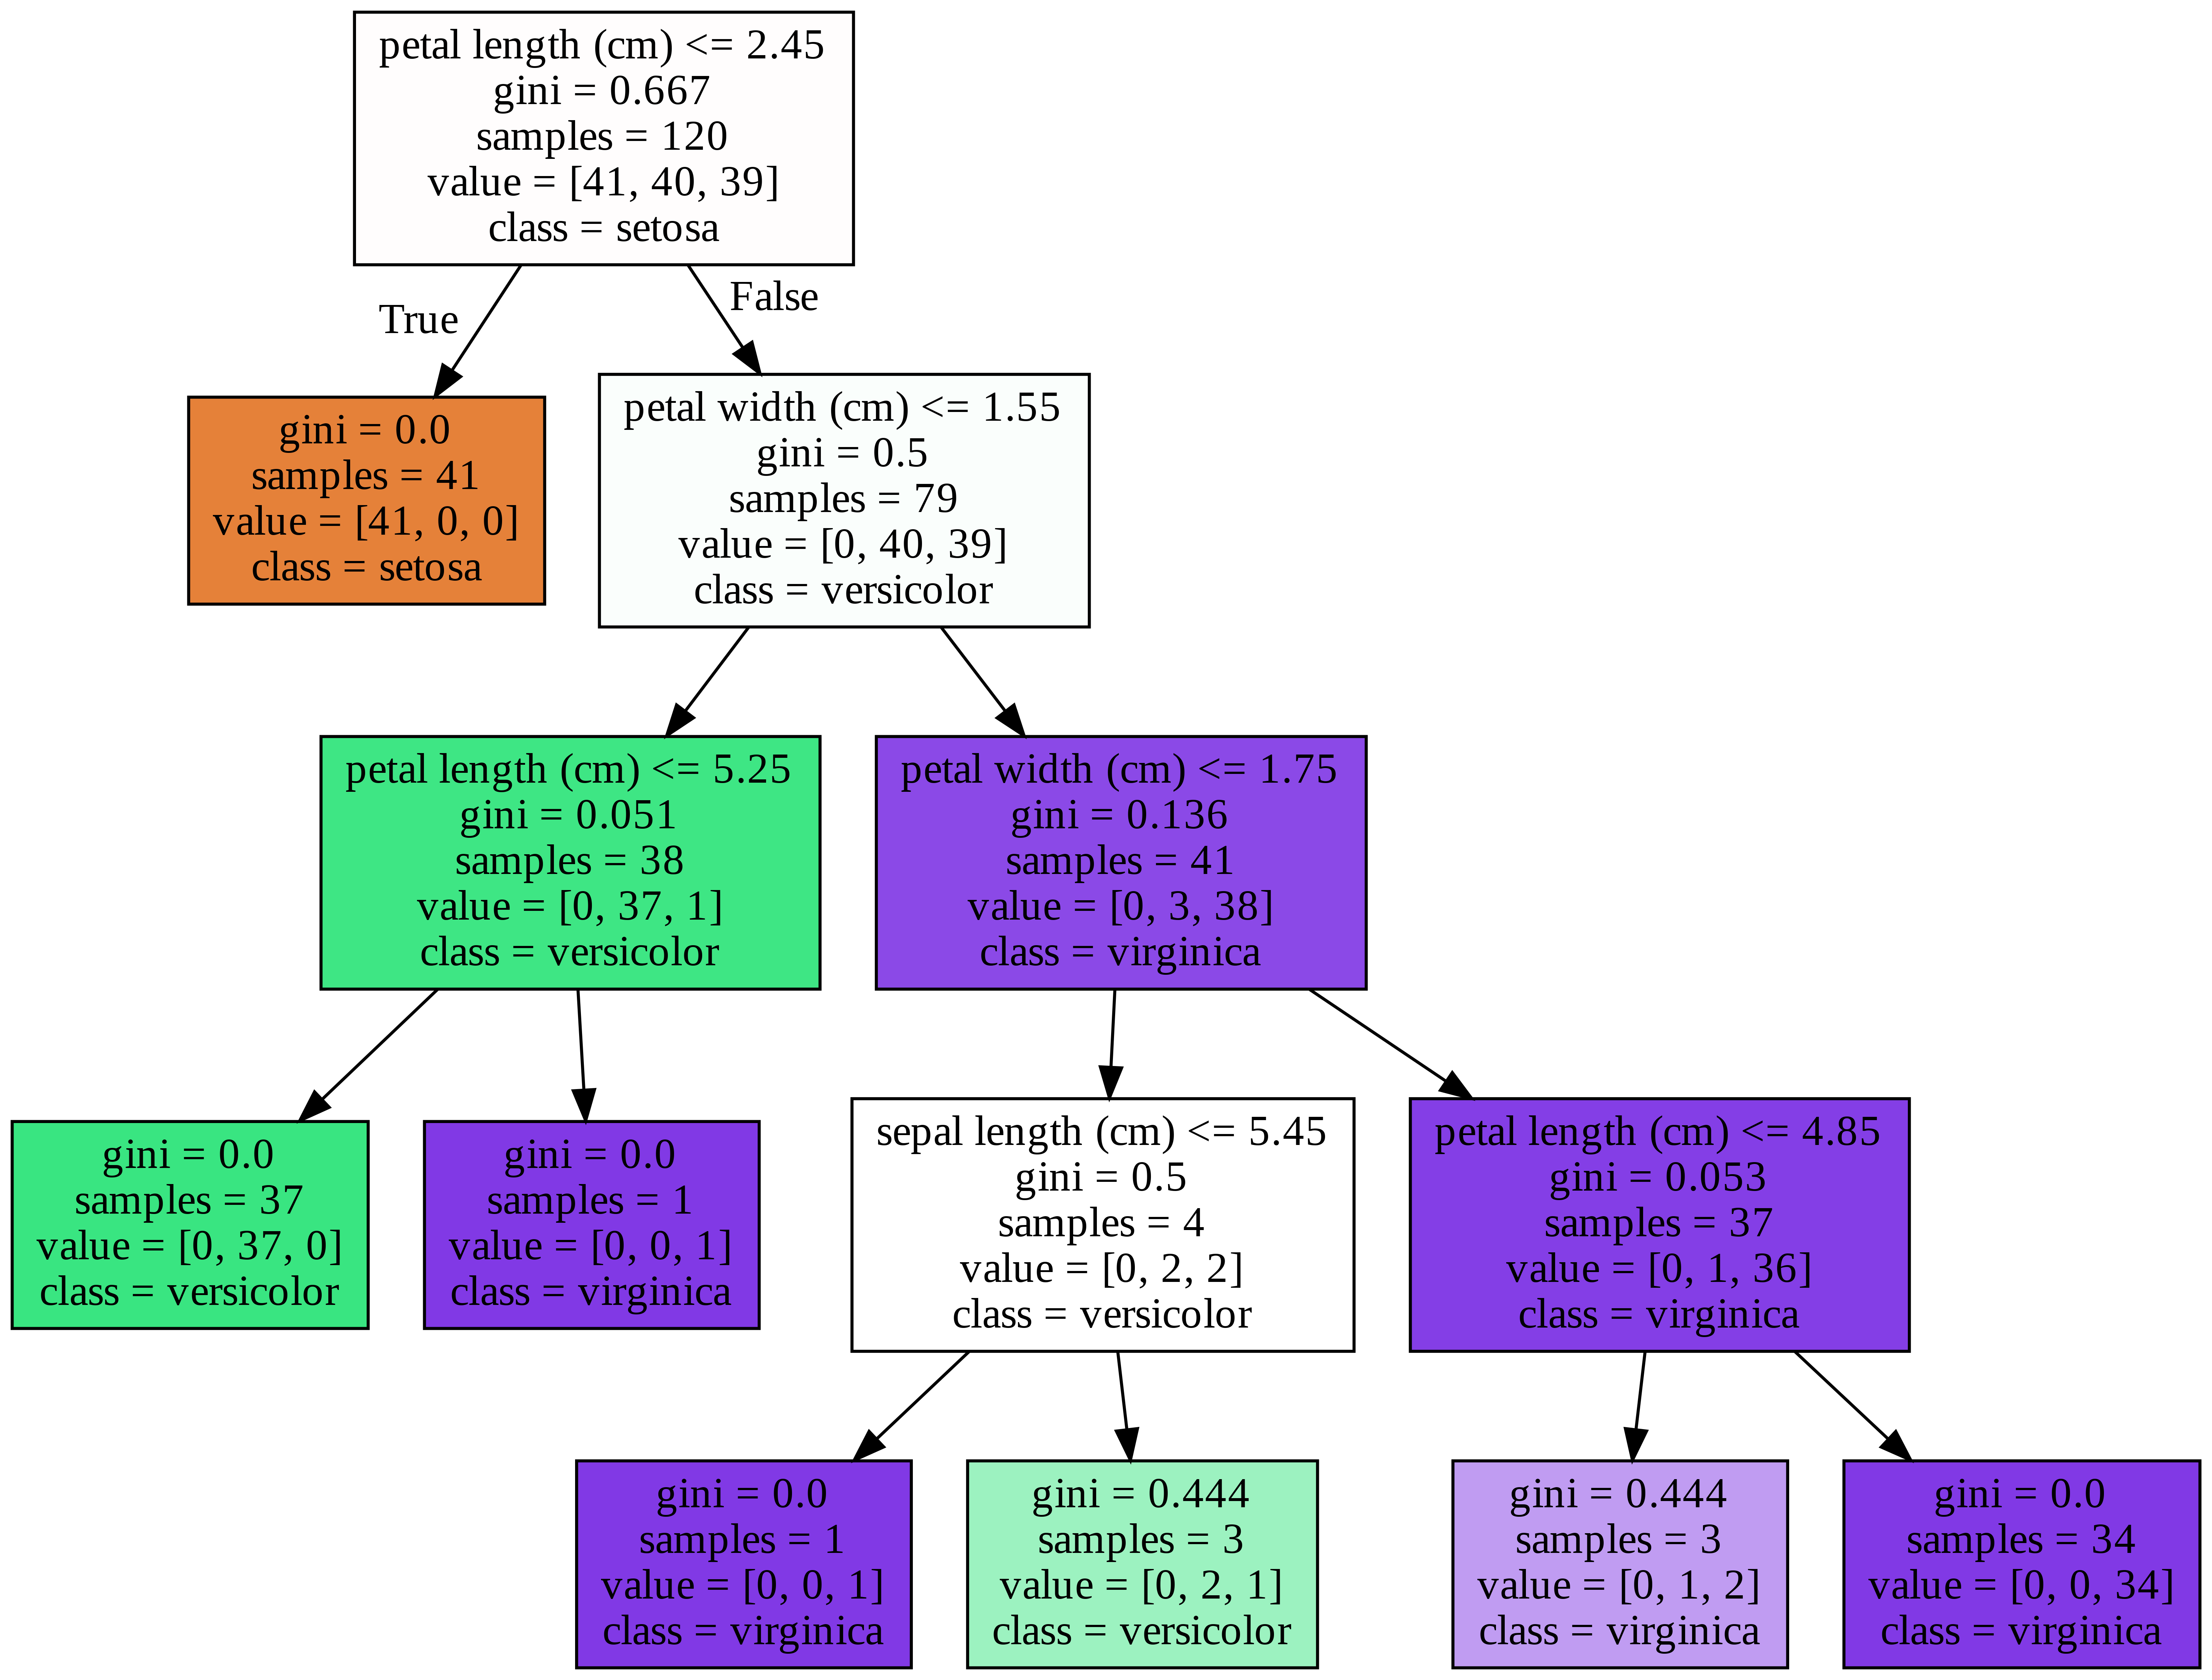

In [ ]:
# 2. 생성된 .dot 파일을 .png 파일로 변환해서 저장 후 출력
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')

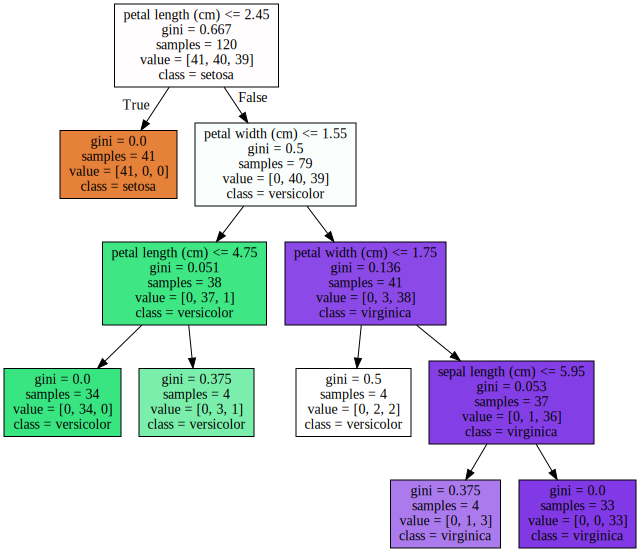

In [ ]:
# 결정 트리 하이퍼 파라미터 튜닝
# min_samples_leaf=4로 상향
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

# 학습
dt_clf.fit(X_train, y_train)

# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일로 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# min_samples_leaf=4로 설정하면
# 최소 4개는 되어야 리프 노드가 됨
# 맨 아래 value=[0. 1. 3] 경우
# 분할하면 최소 샌플 수가 1과 3으로 4보다 작으므로
# 리프 노드가 될 수 없으므로 더 이상 분할하지 않음

# 섞여 있고, 지니 계수가 gini=0.375 약간 크더라도
# 더 이상 분할하지 않고
# 브랜지 노드가 줄어들고 결정 트리가 더 간결하게 만들어짐

# 하피퍼 파라미터 튜닝을 통해
# 브랜치 노드를 줄이고
# 결정 트리를 더 간결하게 만들어
# 과적합이 발생하지 않게 하는 것이 목표

#### 알아두기

일반적인 머신러닝 모델 적용 방법
- 일반적으로 학습 데이터를 GridSearchCV를 이용해서 
- 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 
- 별도의 테스트 세트에서 이를 평가하는 방식

## 평가 성능평가 지표


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

# 아무런 학습도 하지 않고 성별에 따라 생존자를 예측하는
# 단순한 Classifier 생성
# BaseEstimator 를 상속 받음
class MyDummyClassifier(BaseEstimator):
    # fit(): 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass

    # predict() : 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0],1)) # 예측값 초기화: 2차원 형태(, 1)
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1 : # '남자'인 경우
                pred[i] = 0 # 사망
            else :
                pred[i] = 1

        return pred

In [ ]:
# 타이타닉 데이터 전처리 함수(머신러닝05에서 쓴 데이터 전처리 함수)
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫 문자만 추출
    
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 위에서 만든 모든 함수를 한 번에 호출해서 사용하기 위한
# 함수 작성
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [ ]:
# 타이타닉 생존자 예측

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습/테스트 데이터 세트로 분

titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/titanic_train.csv')


# 결정값 (Label)
y_titanic_df = titanic_df['Survived']

X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)


# 위에서 생성한 MyDummyClassifier를 이용하여 학습/예측/평가 수행
my_clf = MyDummyClassifier()
my_clf.fit(X_train, y_train)

pred = my_clf.predict(X_test)

print('DummyClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))


DummyClassifier 정확도 : 0.8324


## 레이블 이코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder 객체 생성한 후
# fit()과 transform() 메서드로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환값 :', labels)

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [ ]:
# 인코딩 전 원래의 값 확인 : classes_속
print('인코딩 클래스 :', encoder.classes_)

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
# 인코딩된 값 디코딩 : inverse_transform()
print('디코딩 원본 값 :', encoder.inverse_transform([0,1,4,5,3,3,2,2]))

디코딩 원본 값 : ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


#### 원-핫 코딩 예제

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


# (1) 먼저 숫자값으로 변환을 하기 위해서 LabelEncoder 사용해서 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels


array([0, 1, 4, 5, 3, 3, 2, 2])

In [ ]:
# (2) 입력 값을 2차원 데이터로 변환
labels = labels.reshape(-1,1) # 컬럼 수 1로 고정, 행은 자동으로 구성 [-1]
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [ ]:
# (3) OneHotEncoder 클래스로 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
oh_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
# 2차원 형태로 출력
print(oh_labels.shape) #8행 6열
print(oh_labels.toarray())

(8, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
print(oh_labels)
# 1값 위치 출력
# [2,4] : 2행 4열의 위치에 1값이 있다.

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [ ]:
# 원-핫 인코딩 전체 과정
from sklearn.preprocessing import OneHotEncoder
import numpy as np




# 원-핫 인코딩 데이터
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 원-핫 인코딩 데이터 차원
# (2) 입력 값을 2차원 데이터로 변환
labels = labels.reshape(-1,1) # 컬럼 수 1로 고정, 행은 자동으로 구성 [-1]


# (3) OneHotEncoder 클래스로 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)


print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 결정 트리 실습

사용자 행동 인식 (Human Activity Recognition) 데이터
- 30명에게 스마트폰 센서를 장학한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터
- UCI 머신러닝 리포지토리(Machine Learning Repository)에서 제공

- 구글 검색 : uci machine learning repository human activity dataset
- features.txt :  561개 Feature 들어 있음 (index와 피처명)
    - 피처명 : 인체의 움직임과 관련된 속성의 평균, 표준편차, ..,이 X, Y, Z축 값으로 되어 있음
- X_train.txt : 561개 각 feauture에 대해 맵핑되는 속성값이 들어 있음


In [ ]:
# 데이터 읽어 오기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt index와 피처명이 공백으로 분리되어 있어서
# 구분자 sep='\s+'
# \s는 공백 문자, \S는 공백 문자가 아닌 나머지 문자, 참조(https://highcode.tistory.com/6)
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df 

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [ ]:
# 피처명만 추출해서 리스트로 생성하고 샘플로 10개만 출력
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


중복된 피처명이 있어서
- 피처명을 변경해서 반한하는 함수 작성
- 전체 : 561개
- 중복 : 84개
- unique : 477개

In [ ]:
# 중복되지 않은 피처명 (unique) 개수 확인
feature_name_df['column_name'].unique().shape


(477,)

In [ ]:
# 중복된 피처명 count
# 그룹별로 count : 1보다 크면 중복

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1 ].count())

# 중복된 피처명과 그룹별 count 확인
feature_dup_df[feature_dup_df['column_index'] > 1 ].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
# 피처명 변경해서 반환하는 과정을 함수로 작성
# 피처명_1 또는 피처명_2로 변경

def get_new_feature_name_df(old_feature_name_df):
    # groupby('column_name').cumcount() : 중복되는 값이 몇 번째에 해당되는지(index) 반환
    # 0이면 첫 번째, 1이면 두 번째, ....
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    # merge()하기 위해 index 값을 갖는 열 필요
    # reset_index() : index를 열로 변환
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset( )

In [ ]:
print('학습 피처 데이터 셋 info')
print(X_train.info(0))

학습 피처 데이터 셋 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986

In [ ]:
X_train.isna().sum().sum()

0

In [ ]:
y_train

,action
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [ ]:
# 레이블 값 확인
y_train['action'].unique()

array([5, 4, 6, 1, 3, 2])

In [ ]:
# 레이블 값 분포 확인 (각 값의 개수)
print(y_train['action'].value_counts())
# 비교적 고르게 분포

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [ ]:
# DecisionTreeClassifier를 이용해서 동작 예측 분류 수행
# 하이퍼 파라미터는 모두 디폴트 값으로 설정해서 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train) # 학습
pred = dt_clf.predict(X_test) # 예측
accuracy = accuracy_score(y_test, pred) # 평가

print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

# 결과
# 결정 트리 예측 정확도 : 85.48 %

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [ ]:
# 하이퍼 파라미터 튜닝 : GridSearchCV를 이용해서 max_depth 값을 계속 늘리면서 
# 예측 성능 측적
# 교차 검증은 5개 세트(cv=5)

from sklearn.model_selection import GridSearchCV

params = { 'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

# 총 35회 학습 : 7개의 max_depth 값 X 교차 검증 5개 세트 (cv)
# verbose : log 출력 level 조정 (출력 메시지 조절)
# verbose = 1 : 간단한 메시지 출력
# verbose = 0 : 메시지 출력없이 결과만 출력
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고평균 정확도 수치 : {0:.4}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

# 결과
# 최고 평균 정확도 : 85.13 % 
# 이때의 최적 파라미터 값 : 16

# 이 예제의 수행 목표는
# max_depth 값의 증가에 따라 예측 성능이 어떻게 변했는지 확인하는 것

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


- verbose=1
- Fitting 5 folds for each of 7 candidates, totalling 35 fits
- GridSearchCV 최고평균 정확도 수치 : 0.8512
- GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 10}

- verbose=0
- GridSearchCV 최고평균 정확도 수치 : 0.8512
- GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 10}

In [ ]:
# 5개의 CV 세트에서 max_depth 값에 따라
# 예측 성능이 어떻게 변했는지
# GridSearchCV의 cv_results_ 속성을 통해 확인
# cv_results_ : CV 세트에서 하이퍼 파라미터를 순차적으로 입력했을 때의 수치
# cv_results_ 에서 추출할 값 : mean_test_score (평균 정확도 수치)

# GridSearchCV의 cv_results_ 속성을 DataFrame으로 생성
cv_resuls_df = pd.DataFrame(grid_cv.cv_results_)

# mxax_depth 파라미터 갓과 그때의 테스트/학습 데이터 셋의 평균 정확도 수치 추출
cv_resuls_df[['param_max_depth', 'mean_test_score']]

# 결과
# mean_test_scoresms max_depth가 16일 때 0.851344로 평균 정확도가 정점이고
# 16이 넘으면 정확도가 계속 떨어짐

# 결정 트리는 완벽한 규칙을 학습 데이터 세트에 적용하기 위해
# 노드를 지속적으로 분할하면서 깊이가 깊어지고 더 복잡한 모델이 됨
# 깊어진 트리는 학습 데이터 세트에서는 올바른 예측 결과를 가져올지 모르겠지만
# 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하 유발

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
# 이번에는 별도의 테스트 데이터 세트에서 결정 트리의 정확도 측정
# max_depth 값을 변화시키면서 학습/테스트 데이터 세트에서 예측 성능 측정

max_depth = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth= depth, random_state=156)
    dt_clf.fit(X_train, y_train) # 학습
    pred = dt_clf.predict(X_test) # 예측
    accuracy = accuracy_score(y_test, pred) # 평가

    print('max_depth : {0}, 정확도 : {1:.4f}'.format(depth, accuracy))

# 결과
# max_depth=8일 경우 정확도 : 0.8707로 가장 높음
# 8을 넘어가면 정확도 계속 감속
# 위의 GridSearchCV 예제처럼 깊이가 깊어질수록 테스트 데이터 세트의 정확도 떨어짐

# 결정 트리의 깊이가 길어질수록 과적합 영향력이 커지므로
# 하이퍼 파라미터를 이용해서 깊이 제어 필요
# 복잡한 모델보다 트리 깊이를 낮춘 단순한 모델이 더 효과적인 결과를 산출할 수 있음

max_depth : 6, 정확도 : 0.8558
max_depth : 8, 정확도 : 0.8707
max_depth : 10, 정확도 : 0.8673
max_depth : 12, 정확도 : 0.8646
max_depth : 16, 정확도 : 0.8575
max_depth : 20, 정확도 : 0.8548
max_depth : 24, 정확도 : 0.8548


In [ ]:
# max_depth와 min_samples_split을 같이 변경하면서 
# 정확도 성능 튜닝

params = {
    'max_depth'  : [8, 12, 16,  20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고평균 정확도 수치 : {0:.4}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

# 결과
# max_depth : 8
# min_samples_split : 16
# 가장 최고의 정확도 : 85.49 %
# 이 때 최적의 estimator : best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.2min finished


GridSearchCV 최고평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# max_depth와 min_samples_split을 같이 변경하면서 
# 정확도 성능 튜닝

params = {
    'max_depth'  : [8, 12, 16,  20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고평균 정확도 수치 : {0:.4}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

# 결과
# max_depth : 8
# min_samples_split : 16
# 가장 최고의 정확도 : 85.49 %
# 이 때 최적의 estimator : best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# 앞 예제에서 grid_cv 객체의 best_estimator_ 속성을 이용해서
# 테스트 데이터 세트에 예측 수행 
# best_estimator_ 속성 : 최적의 하이퍼 파라미터 max_depth : 8, min_samples_split : 16으로
# 학습이 완료된 Estimator

best_df_clf = grid_cv.best_estimator_ 

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)

print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# 결과
# max_depth : 8, min_samples_split : 16일 때
# 테스트 데이터 세트의 에측 정확도 : 약 87.17 %

결정 트리 예측 정확도 : 0.8717


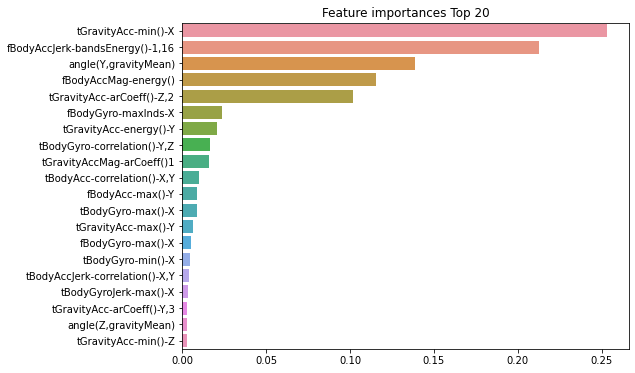

In [ ]:
# 결정 트리에서 feature_importances_ 속성을 이용헤 각 피처의 중요도 확인
# 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 보팅 방식의 앙상블 예제 : 위스콘신 유방암 데이터 세트 예측 분석

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
# estimators 복수 : 리스트 형태
# lr_clf 이름을 LR로
# knn_clf는 이름을 KNN
# 보팅 방식 : 디폴트는 hard인데 soft 설정
vo_clf = VotingClassifier(estimators=[('LR',lr_clf) , ('KNN', knn_clf)], voting='soft')

# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
# 개별 모델들이 다 학습하고 예측한 결과로 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test) # 서로 투표로 예측
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 로지스틱 회귀와 KNN 각 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    
# 결과
# 보팅 분류기의 정확도가 조금 높게 나타났는데
# 보팅으로 여러 개의 분류기를 결합한다고 해서
# 무조건 예측 성능이 향상되지는 않음

# 그래도 보팅, 배깅, 부스팅 등의 앙상블 방법은
# 전반적으로 다른 단일 ML 알고리즘 보다 어느 정도 뛰어난 예측 성능을 가지는 경우가 많음

# 고정된 데이터 세트에서
# 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라도
# 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성되어 있기 때문에
# 다양한 관점을 가진 알고리즘이 서로 결합해서
# 더 나은 성능을 실제 환경에서 이끌어 낼 수 있음


Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


## 랜덤 포레스트 (Random Forest)

In [ ]:
# 피처명 변경해서 반환하는 과정을 함수로 작성
# 피처명_1 또는 피처명_2로 변경

def get_new_feature_name_df(old_feature_name_df):
    # groupby('column_name').cumcount() : 중복되는 값이 몇 번째에 해당되는지(index) 반환
    # 0이면 첫 번째, 1이면 두 번째, ....
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    # merge()하기 위해 index 값을 갖는 열 필요
    # reset_index() : index를 열로 변환
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset( )

dt_clf = RandomForestClassifier(random_state=0)
dt_clf.fit(X_train, y_train) # 학습
pred = dt_clf.predict(X_test) # 예측
accuracy = accuracy_score(y_test, pred) # 평가

print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

# 정확도 높게 나온 편
# 수행 속도 괜찮게 그렇게 좋은 편은 아니다

랜덤 포레스트 정확도 : 0.9253


#### 랜덤 포레스트 하이퍼 파라미터 튜닝(GridSearchCV를 이용)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 테스트 해 볼 데이터를 많이 넣으면 기하급수적으로 늘어남
params = {
    'n_estimators' : [100], # 1차적으로 100으로 하고, 나중에 최적화되면 늘려서 최종 예측 수행
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 10, 20]  # 4x3x3 : 36번
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# n_jobs=-1 : 전체 CPU 콜을 다 활용하라는 것임
# 개인 PC가 굉장히 많은 수행 성능을 차지하니까 느려짐
# 길게 걸릴 수 있음

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
# cv=2 : 너무 많게 설정하면 실행 시간이 오래 거림 (총 72번 수행 : 36 x 2)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최적 예측 정확도 :\n', grid_cv.best_score_)

# 'max_depth': 10
# 'min_samples_leaf': 8, 
# 'min_samples_split': 8

최적 하이퍼 파라미터 :
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최적 예측 정확도 :
 0.9179815016322089


In [ ]:
# 튜닝된 하이퍼 파라미터로 재 학습 및 예측 / 평가
# GridSearchCV로 찾은 최적의 하이퍼 파라미터를
# 랜덤 포레스트에 적용해서 예측 수행

# n_estimators=300으로 늘임
# 위 결과의 최적 하이퍼 파라미터를 다 입력해서
# RandomForestClassifier 초기화키기고
# 예측 성능 측정

rf_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0, n_jobs=-1)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

print('최적 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 최적 예측 정확도 : 0.9165
# 정확도가 낮아졌음

최적 예측 정확도 : 0.9165


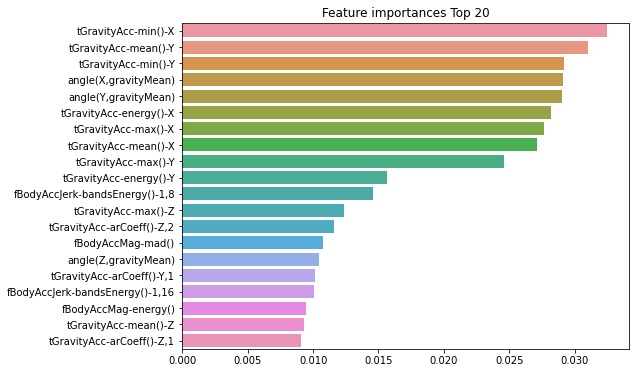

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# sort_values() 쉽게 하기 위해서 시리즈로 만들고, 
# 최고 중요도가 높은 20개 피처들만 추출
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
# x축은 중요도 값, y축은 ftr_top20 시리즈의 index
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## GBM (Gradient Boosting Machine) : 그래디언트 부스트

In [ ]:
# 피처명 변경해서 반환하는 과정을 함수로 작성
# 피처명_1 또는 피처명_2로 변경

def get_new_feature_name_df(old_feature_name_df):
    # groupby('column_name').cumcount() : 중복되는 값이 몇 번째에 해당되는지(index) 반환
    # 0이면 첫 번째, 1이면 두 번째, ....
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    # merge()하기 위해 index 값을 갖는 열 필요
    # reset_index() : index를 열로 변환
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7월27일 수업 내용/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정 : 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f}'.format(time.time() - start_time))


# 결과
# 기본 하이퍼 파라미터만으로도 93.89 %의 예측 정확도로
# 앞의 튜닝된 하이퍼 파라미터로 재학습 및 예측/평가한
# 랜덤 포레스트(91.65 %)보다 나은 예측 성능을 나타냄

# 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많음
# 문제 : 시간 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요

# GBM이 극복해야 할 중요 과제 : 수행 시간
# 사이킷런의 GradientBoostingClassifier는
# 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로
# 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않아서
# 대용량 데이터의 경우 학습에 매우 많은 시간이 필요

# 데이터 커지면 커질수록 너무 오래 걸려서
# 하이퍼 파라미터 튜닝하기 많이 어려움

# 반면에 랜덤 포레스트의 경우
# 상대적으로 빠른 수행 시간을 보장해주기 때문에
# 좀 더 쉽게 예측 결과 도출할 수 있음

GBM 정확도 : 0.9382
GBM 수행 시간 : 797.6


### GBM 하이퍼 파라미터 및 튜닝

In [ ]:
# GridSearchCV 이용해서 하이퍼 파라미터 최적화
# 사용자 행동 데이터 세트 정도의 데이터 양에
# 많은 하이퍼 파라미터로 튜닝하게 되면 시간이 상당히 오래 걸림
# 간략하게 n_estimators와 learning_rate만 적용

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

# 실행시간이 30분 ~ 1시간 30분 정도 소요될 것임

# learning_rate이 0.05, n_estimators가 500일 때
# 2개의 교차 검증 세트에서 90.1%의 최고 예측 정확도 도출

In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score']]

In [ ]:
# GridSearchCV를 이용해서 최적으로 학습된 estimator로
# 테스트 데이터 세트에 적용해서 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))

# 결과
# 테스트 데이터에서 약 96.06% 정확도 도출

GBM은 수행 시간이 오래 걸린다는 단점이 있지만
과적합에도 강해서 예측 성능이 뛰어난 알고리즘
많은 알고리즘이 GBM을 기반으로 해서 새롭게 만들어 지고 있음

머신러닝 세계에서 가장 각광을 받는 그래디언트 부스팅 기반 ML 패키지
- XGBoost
- LightGBM

## XGBoost (eXtra Gradient Boost)

XGBoost
- 트리기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중의하나
- 압도적인 수치 차이는 아니지만
- 분류에 있어서 일반적으로 다른 머신러닝 보다 뛰어난 예측 성능을 나타냄
- GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결

XGBoost 장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간 
- 과적합 규제
- 가지치기 (pruning)
- 교차 검증 내장
- 결손값 자체 처리



- 너무 반복 횟수를 단축할 경우
- 예측 성능 최적화가 안 된 상태에서 학습이 종료될 수 있으므로 주의 필요

조기 중단 설정을 위한 주요 파라미터
- early_stoppings : 더 이상 비용 평가 지표가 감소하지 않는 최대 반복 횟수
- eval_metric : 반복 수행 시 사용하는 비용 평가 지표
- eval_set : 평가를 수행하는 별도의 검증 데이터 세트
    - 일반적으로 검증 데이터 세트에서 반복적으로 비용 감소 성능 평가

In [ ]:
!pip install -q xgboost==0.4a30
import xgboost

     |████████████████████████████████| 753 kB 8.5 MB/s 


In [ ]:
# XGBoost 버전 확인

import xgboost

xgboost.__version__

'0.90'

### XGBoost 예제 : 위스콘신 유방암 예측

In [ ]:
# 데이터 세트 로드

import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

# 데이터 프레임으로 생성
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

# 맨 마지막에 target 추가
# 악성 0, 양성 1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
# 레이블 값 분포 확인
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer_df['target'].value_counts()
# 악성(malignant) : 0
# 양성(benign) : 1

1    357
0    212
Name: target, dtype: int64

In [ ]:
# 전체 데이터 중에서 80%는 학습용 데이터, 20%는 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)

# 학습용 피처 데이터 세트, 테스트용 피처 데이터세트
# 피처 수 : 30

(455, 30) (114, 30)


In [ ]:
# 하이퍼 파라미터 설정

# objective : 예측하는 결정 함수 설정 (0 또는 1 이진 분류이므로 binary:logistic)
# - 없어도 판단해서 2진 분류이면 이대로 적용
# eval_metric : 오류 함수의 평가 성능 지표
# - 자체적으로 평가하는데, 손실에 대한 것 측정
# logloss : 모델이 예측한 확률 값을 직접적으로 반영하여 평가
# num_rounds : 부스팅 반복 횟수

params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric': 'logloss'
}

num_rounds = 400

In [ ]:
# 파이썬 xgboost를 사용하려면 DMatrix 타입으로 변환해야 함
# 변환된 학습용, 테스트용 데이터 세트 생성
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# 지정한 파라미터로 모델 학습

# train 데이터 셋은 'train', evaluation 데이터 셋은 'eval'로 명기
wlist = [(dtrain, 'train'), (dtest, 'eval')] # eval : 평가용

xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

## 분류 예제 : 캐글 신용카드 사기 검출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/7:28/creditcard.csv')
card_df.head()

# Time : 크게 의미 있는 칼러은 아님. 데이터 만드는 데 걸린 시간 ; 나중에 삭제할 것임
# v1~v28 속성 : 피처 이름이 전혀 들어가 있지 않음
# kaggle에서 칼럼을 확인해보면
# 민감한 정보를 보호하기 위해서 PCA로 압축한 속성
# Amount : 카드 사용액
# Class : 0은 정상 사용, 1은 부정 카드 사용

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_df.shape 
# 284807 레코드(행, 건수)
# 31 피처와 타깃값(레이블값)

(284807, 31)

In [5]:
# 전처리 함수
# Time 칼럼만 삭제
# 원본 데이터 유지하고, 복사본 반환

from sklearn.model_selection import train_test_split

# 전달 받은 DataFrame을 복사한 뒤 ime 칼럼 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [6]:
# 학습/테스트 데이터 셋을 반환하는 함수 
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    # 피처 데이터/ 레이블 데이터 셋 생성
    X_features = df_copy.iloc[:, :-1] # 피처 : 마지막 칼럼 전까지
    y_target = df_copy.iloc[:, -1] # 레이블(타깃) : 마지막 칼럼
    
    # 학습/테스트 데이터 셋 분할
    # stratify=y_target : 타깃 값의 분포도에 맞춰, 학습/테스트 데이터 분표 비율 맞춰서 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [7]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)

print('\n테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

# 0과 1의 비율에 맞춰 학습 데이터와 테스트 데이터가 잘 분리되었음

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64

테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [8]:
# 예측 평가 수행 함수 (앞에서 복사해 올 것)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [9]:
# 먼저 LogisticRegression부터 학습/예측/평가 수행

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

# 결과
# 재현율이 낮게 나왔음
# 불균형한 데이터라서 재현율 부분을 중요하게 생각하면 되겠는데
# 재현율이 낮아서 예측 모델로 만족스럽지 못함

오차 행렬
[[85282    13]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.9711


In [10]:
# 앞으로 피처 엔지니어링을 수행할 때마다
# 모델을 학습/예측/평가하는데 사용할 함수 작성

# 사이킷런의 Estimater객체, 학습/테스트 데이터 세트 입력 받아서
# 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgr_train=None, tgt_test=None):
    model.fit(ftr_train, tgr_train) # 학습
    pred = model.predict(ftr_test) # 예측(값)
    pred_proba = model.predict_proba(ftr_test)[:, 1] # 예측 확률
    get_clf_eval(tgt_test, pred, pred_proba)  # 실제 데이터, 예측값, 예측 확률

In [11]:
# pip install lightgbm

# LightGBM 이용해서 학습/예측/평가 수행
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# LightGBM이 LogisticRegression보다 전반적으로 성능이 좋음
# 특히 정밀도와 재현율이 성능 많이 향상되었음

오차 행렬
[[85290     5]
 [   38   110]]
정확도: 0.9995, 정밀도: 0.9565, 재현율: 0.7432,    F1: 0.8365, AUC:0.9779


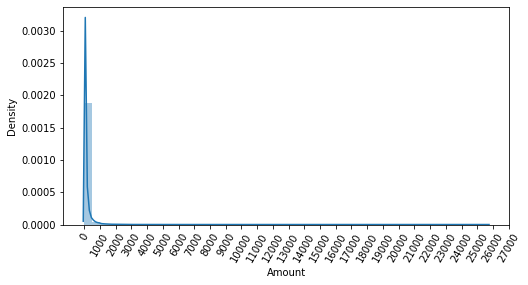

In [12]:
# 중요 속성(피처)으로 Amount 선정해서 분포도 확인

import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

# 대부분의 금액이 500 유로 미만인데
# 나머지 작은 값들이 존재 256000까지
# 불균형하게 가지고 있음
# 작은 값들이 길게 롱테일을 가지고 있는 구조

In [13]:
# 사전 데이터 가공 함수에 Amount 피처 변환 추가
# StandartScaler를 이용해서 정규분포 형태로 Amount 피처 변환

from sklearn.preprocessing import StandardScaler

# 전달 받은 DataFrame을 복사한 뒤 ime 칼럼 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    # Amount 칼럼 변환
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    # 변환된 Amount를 피처명 변경하고 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

In [14]:
# LogistRegression / LightGBM 이용해서 학습/예측/평가 수행


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# StandardScaler 변환 후 결과
# 로지스틱 회귀는 겅의 동일
# LightGBM은 정밀도와 재현율이 약간 향상됨
# 많이 차이는 없음

로지스틱 회귀 예측 성능
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9707
LightGBM 예측 성능
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9773


In [15]:
# Amount를 로그 변환

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 로그 변환 : 넘파이의 log1p() 이용하여 Amount 로그 변환
    # 넘파이의 로그 변환 함수는 mp.log()인데
    # 보통 로그 변환할 때 log() 잘 사용 안하고 log1p() 사용
    # 1p가 원 플러스로 하나를 더하겠다는 의미
    amount_n = np.log1p(df_copy['Amount'])    
    
    # 변환된 Amount를 피처명 변경하고 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

In [16]:
# Amount 로그 변환 후
# LogistRegression / LightGBM 이용해서 학습/예측/평가 수행


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# Amount 로그 변환 결과
# 로지스틱 회귀 : 정밀도가 약간 향상됨

# LightGBM은 정밀도, 재현율 등 약간씩 성능 향상

로지스틱 회귀 예측 성능
오차 행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081,    F1: 0.7200, AUC:0.9721
LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9786


(3) 이상치 데이터 제거 후 모델 학습/예측/평가

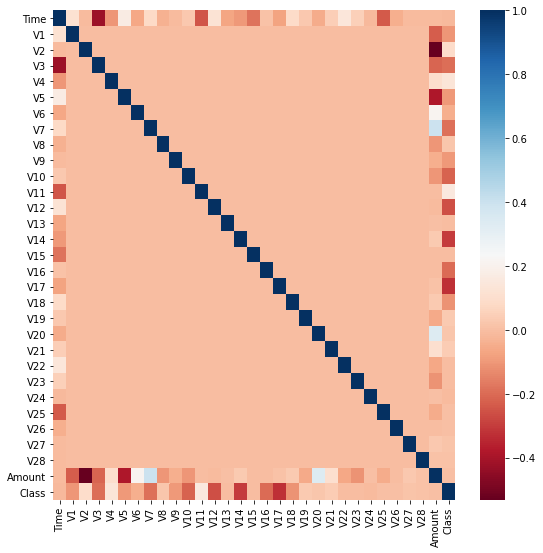

In [18]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr() # 각 칼럼들의 상관도 값 반환
sns.heatmap(corr, cmap="RdBu")

# 상관도 값을 직관적으로 이해할 수 있도록 시각적으로 표현
# 오른쪽 막대 색상 : 위쪽 파색이 짙어질수록 양의 상관관계가 높음(1)
# 아래쪽 빨간색이 짙어질수록 음의 상관관계 높아짐(-1)
# 대각선 : 각 피처 값이 같으므로 당연히 1 (짙은 파란색)

# Class 값과 상관도가 높은 피처들 : x출에서 v12, v14, v17 (짙은 빨간색)
# 이 중에서 v14에 해당되는 이상치 확인

In [19]:
# 아웃라이어를 찾기 위한 함수 새로 생성

import numpy as np

# weight는 boxplot에서 이상치 계산시 1.5*IQR(몸통)을 더하고, 뺀 값들이 이상치
# 전체 데이터에서 찾지 않고 사기 데이터 (Class가 1인)에서 찾음
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column] # column 값으로 V14 들어올 것임
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25    

    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 데이터 프레임 인덱스 찾음
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [20]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스 : ', outlier_index)

# 4개 인덱스 : 이 인덱스에 해당되는 행은 삭제할 것임

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [21]:
# 로그 변환 + V14 피처의 이상치 데이터 삭제 후 모델들 재학습/예측/평가

def get_preprocessed_df(df=None):
    # 로그 변환
    df_copy = df.copy()   
    amount_n = np.log1p(df_copy['Amount'])   
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True) # axis=1 열
    
    # 이상치 데이터 삭제
    outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True) # axis=0 행
        
    return df_copy

In [22]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
# lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

print('LightGBM 예측 성능')
# lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
#                          boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# 이상치 제거 결과
# 로그 변환 후 결과보다 
# LightGBM이 전반적으로 성능 향상 보임
# 특히 재현율이 많이 향상된 것으로 보임

# 로지스틱 회귀 VS LightGBM
# LightGBM이 정밀도, 재현율, F1에서 좀 더 성능이 좋은 것으로 나타남

로지스틱 회귀 예측 성능
오차 행렬
[[85282    13]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8829, 재현율: 0.6712,    F1: 0.7626, AUC:0.9747
LightGBM 예측 성능
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9831


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

# train 데이터 셋으로 들어오는 값들에 대해서 오버 샘플링 
# 타깃값의 분포에 맞춰 피처값 생성
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ', X_train_over.shape, y_train_over.shape)

print('SMOTE 적용 후 레이블 값 분포\n', pd.Series(y_train_over).value_counts())

# 결과
# 적용 후 train 데이터가 많이 늘어남
# 적용 후 레이블 값 두 개가 동일 : (증식 되었음)
# 0    199020,  1    199020

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포
 1    199020
0    199020
dtype: int64


In [24]:
# 원래의 레이블 값 두 개 분포
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

In [25]:
# 증식된 데이터에 기반해서 로지스틱 회귀로 학습/예측/평가 수행

lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgr_train=y_train_over, tgt_test=y_test)

# 결과
# 재현율 : 상당히 좋아졌음
# 정밀도와 F1 스코어 : 엄청 떨어짐 (어이없는 수치)
# 이 모델을 실제 적용하기는 힘듦 : 정밀도가 너무 낮기 때문에 

오차 행렬
[[82932  2363]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0540, 재현율: 0.9247,    F1: 0.1021, AUC:0.9737


In [26]:
# 정밀도-재현율 곡선 시각화

# 앞에서 사용한 것 그대로 복사해서 사용

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

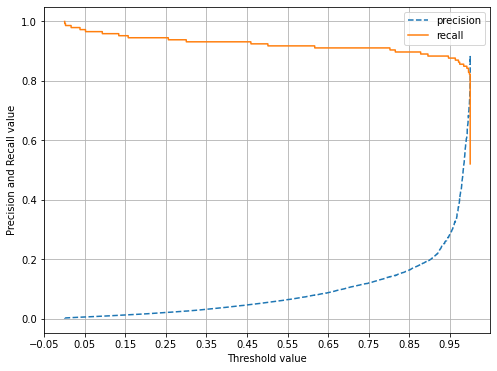

In [27]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])
# 재현율은 좋은데 정밀도가 너무 낮음 - 실제 적용하기 어려움
# 부적합한 모델

In [28]:
# LightGBM 모델 적용
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgr_train=y_train_over, tgt_test=y_test)

# 결과
# 재현율은 약가 높아짐
# 정밀도 떨어짐
# 정밀도를 희생시켜서 재현율을 높이는 결과로 추출되었음
# LightGBM의 경우 전반적으로 향상되었고, 
# 특히 정밀도와 재현율을 상당한 수준으로 끌어 올릴 수 있었음

오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493,    F1: 0.8889, AUC:0.9789


### 선형 회귀 예제

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

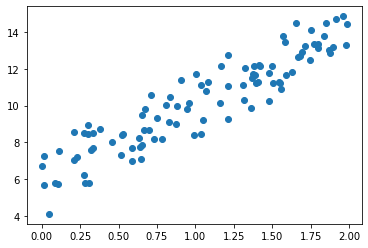

In [34]:
# 데이터 생성
np.random.seed()

# X 축 값
X = 2 * np.random.rand(100, 1) # 100개

# Y 축 값 : y = 6 + 4X  (w0=6, w1=4)
# 퍼져 보이게 하기 위해 노이즈 값을 줌
y = 6 + 4*X + np.random.randn(100, 1)

plt.scatter(X, y)

In [35]:
np.random.randn(10, 1)

array([[-1.9366707 ],
       [-0.10270542],
       [-0.12060618],
       [ 0.08392177],
       [ 1.22643104],
       [ 0.84776542],
       [ 0.19278087],
       [-0.86867292],
       [ 0.46876217],
       [-0.48203868]])

In [36]:
np.random.rand(10, 1)

array([[0.78579914],
       [0.68855896],
       [0.22131829],
       [0.25176961],
       [0.08332573],
       [0.81690328],
       [0.7366025 ],
       [0.9163873 ],
       [0.02077344],
       [0.37914378]])

In [37]:
# 단순 선형 회기 분석
# LinearRegression 알고리즘으로 학습
# X : 피처값
# Y : 타깃값

from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression() # 객체 생성
line_fitter.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# X가 1.5248의 타깃값 예측
y_predicted = line_fitter.predict(np.array([[1.5248]]))
y_predicted

array([[12.1702383]])

In [39]:
# 회귀 계수 : coef_ 속성
line_fitter.coef_

array([[3.97889755]])

In [40]:
# 절편 확인 : y = 6 + 4X (절편 : 6)
line_fitter.intercept_

array([6.10321532])

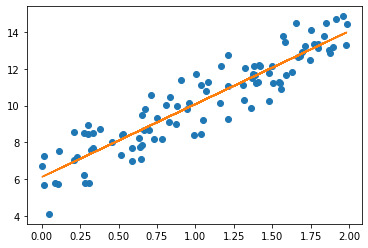

In [41]:
# 단순 선형 회귀 시각화
plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X))
plt.show()

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측 예제

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

# boston 데이터 셋 로드
boston = load_boston()

# DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
# bostonDF.head(3)

# boston 데이터셋의 target 주택 가격
# 이를 PRICE 칼럼으로 데이터 프레임에 추가
bostonDF['PRICE'] = boston.target

print('Boston 데이터셋 크기 : ', bostonDF.shape)

bostonDF.head()

# 예측해야 할 값 : PRICE (레이블값, 결정값, 타깃값)

Boston 데이터셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

In [43]:
bostonDF.info()

# null 값없고 모두 float 형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


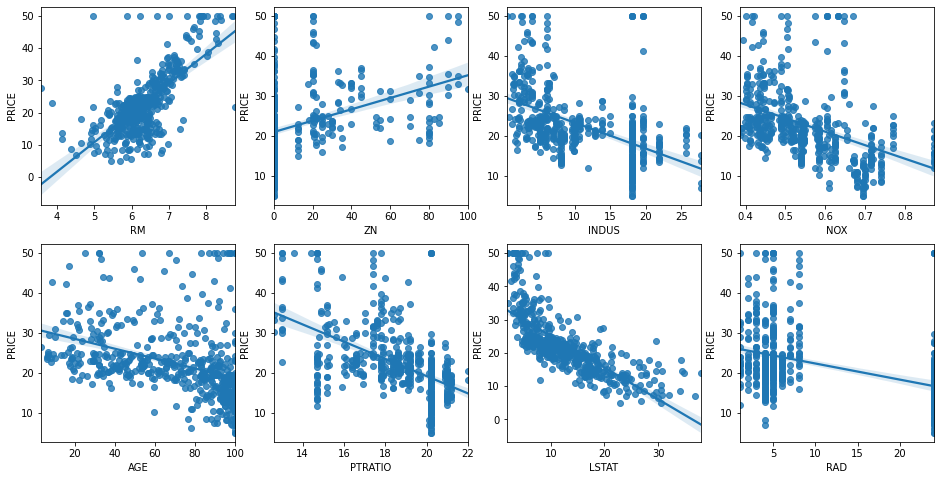

In [44]:
# 2개의 행과 4개의 열을 가진 subplots를 이용
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

# 각 요소에 대해
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # Seaborn의 regplot() 이용 산점도와 함께 선형 회귀 직선표시
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])
    
# 결과
# 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남
# RM(방 개수) : 양의 방향 선형성이 가장 큼 (방의 크기가 클스록 가격이 증가)
# LSTAT(하위 계층의 비율) : 음의 방향 선형성 가장 큼(LSTAT이 작을수록 PRICE가 증가)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 타깃값 데이터 셋 만들기
y_target = bostonDF['PRICE']
# 피처값 데이터 셋 만들기
# 타깃 제외한 나머지 칼럼들
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# LinearRegression으로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds) # 예측 오류값
rmse = np.sqrt(mse) # 사이킷런이 지원하지 않기 때문에 np.sqrt() 이용

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# MSE : 실제값과 예측값의 차이를 제곱해서 평균한 것
# RMSE : MSE에 루트 씌운 값 (낮을 수록 성능 좋음)
# R제곱(r2_scor): 분산 기반으로 예측 성능 평가
# 실제값의 분사 대비 예측값의 분산 비율
# 1에 가까울수록 예측 정확도가 높음

# RMSE : 4.159
# Variance score : 0.757
# 나쁜 수치는 아니지만 만족할만한 수치는 아님

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [46]:
# LinearRegression으로 생성한 주택가격 모델의
# 절편과 회귀 계수 값 확인
# 절편 : intercept_ 속성에 저장
# 회귀 계수 : coef_ 속성에 저장

print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172164755
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [47]:
# coef_ 속성은 회귀 계수 값만 가지고 있으므로
# 회귀 계수값을 칼럼별로 매칭
# 내림차순 정렬

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False) # 내림차순 정렬

# 결과
# RM이 3.4로 회귀 계수가 가장 큼
# 특이 사항 : NOX 피처의 회기 계수가 - 값으로 너무 큼 (NOX 값 때문에 예측 오류값이 달라질 수 있음)
# 최적화 수행하면서 피처 회기 계수 변화도 같이 살펴볼 예정

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [48]:
# 5개의 폴드 세트에서 교차 검증 수행
# MSE와 RMSE 측정

from sklearn.model_selection import cross_val_score

# 5 Fold 셋으로 MSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)

# RMSE = MSE에 -1 곱한 후 sqrt() 적용
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

# 좀 더 정확한 평가를 위해서 교차 검증을 수행했는데
# RMSE값이 약간 더 높게 나타남
# 만족할 만한 수치는 아님

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829
